<a href="https://colab.research.google.com/github/Vanagand/DS-Unit-1-Build/blob/master/DS_Unit_1_Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Import

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines

###**Question** - Is there corrolation between the arable land area in Canada and cancer incidents rates?

## Number and Area of Census Farms - Canada and the Provinces Plot

Source: Ministry of Agriculture, Food, and Rural Affairs



In [6]:
cdn_farm_area_df = pd.read_csv('https://github.com/Vanagand/DS-Unit-1-Build/raw/master/cdn_farm_area.csv')

# .drop(['input'], axis=int, inplace=bool)
# .reset_index()
# .rename({'input':'output', 'input': 'output'}, axis=int)

cdn_farm_area_df.head()

,date,geo,val_farms,val_area
0,1996,Newfoundland,742,108.3
1,2001,Newfoundland,643,100.3
2,2006,Newfoundland,558,89.4
3,2011,Newfoundland,510,77.3
4,2016,Newfoundland,407,70.7


In [7]:
def val_to_int(val_content): # val_to_int feature 
  return int(val_content)

cdn_farm_condition = cdn_farm_area_df['geo'] == 'Canada'
cdn_farm_cdn_plot = cdn_farm_area_df[cdn_farm_condition].drop(['val_farms'], axis=1)

print(cdn_farm_area_df['geo'].value_counts())
print('')
cdn_farm_cdn_plot.head()

Alberta                 5
Quebec                  5
Newfoundland            5
Canada                  5
British Columbia        5
Saskatchewan            5
Prince Edward Island    5
Manitoba                5
Ontario                 5
Nova Scotia             5
New Brunswick           5
Name: geo, dtype: int64



,date,geo,val_area
50,1996,Canada,168167.5
51,2001,Canada,166802.2
52,2006,Canada,167010.5
53,2011,Canada,160155.7
54,2016,Canada,158723.1


In [8]:
# explore val_area data as a list
cdn_wb_area_geo_condition = cdn_farm_area_df['geo'] == 'Alberta'
wb_farm_area = cdn_farm_area_df[cdn_wb_area_geo_condition]

list(wb_farm_area['val_area'])

[51964.4, 52058.9, 52127.9, 50498.8, 50250.2]

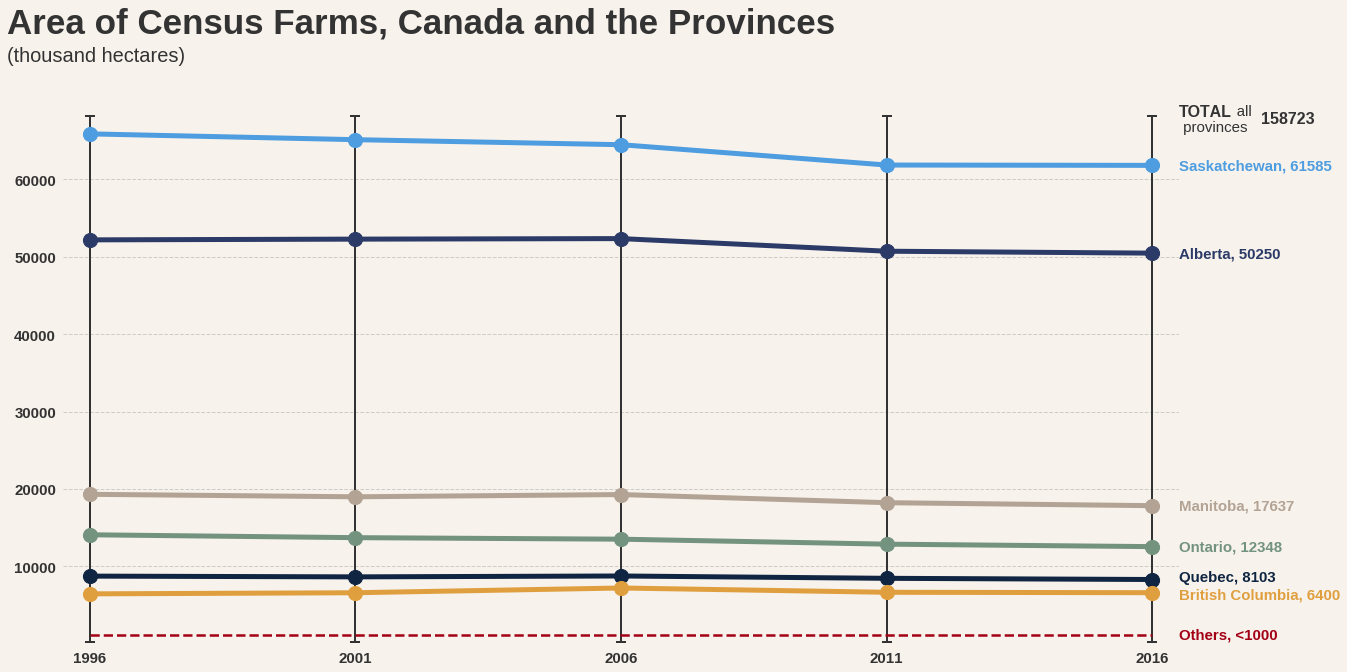

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))

font = FontProperties()
font.set_style('normal')

fig.patch.set(facecolor='#F7F2EC') # background (exterior)
ax.set(facecolor='#F7F2EC') # axes background (interior)

plt.style.use('seaborn-ticks') # plot style

plt.title(x=-0.05, y=1.125, label="Area of Census Farms, Canada and the Provinces", 
          ha='left', fontproperties=font, weight='bold', fontsize=35, 
          color='#333333', transform=ax.transAxes)
ax.text(x=-0.05, y=1.072, s='(thousand hectares)', 
        ha='left', weight='normal', fontsize=20, color='#333333', 
        transform=ax.transAxes)

data_qc = (8540.5, 8443.7, 8557.1, 8256.6, 8103.2)
# data_ns = (1055.9, 1005.8, 995.9, 1018.1, 915.7) omitted too small
# data_nb = (953.9, 958.9, 976.6, 937.8, 835.3) omitted too small
data_bc = (6249.4, 6392.9, 7006.6, 6452.9, 6400.5)
data_on = (13879.6, 13507.4, 13310.2, 12668.2, 12348.5)
# data_nl = (108.3, 100.3, 89.4, 77.3, 70.7) omitted too small
data_mb = (19106.5, 18784.4, 19073.0, 18023.5, 17637.6)
data_sk = (65653.6, 64903.8, 64253.8, 61628.1, 61585.8)
# data_pe = (655.4, 646.1, 619.9, 594.3, 575.5) omitted too small
data_ab = (51964.4, 52058.9, 52127.9, 50498.8, 50250.2)

data = (276548, 246923, 229373, 205730, 193492)
year = (-0.9, 0.1, 1.1, 2.1, 3.1)
n = 5
plot_width = np.arange(n)

# custom cosmetic axvlines
plt.plot([-0.9, -0.9], [0, 68000], marker='_', mew=2, markersize=10, 
         linewidth=2, c='#333333', zorder=1)
plt.plot([0.1, 0.1], [0, 68000], marker='_', mew=2, markersize=10, 
         linewidth=2, c='#333333', zorder=1)
plt.plot([1.1, 1.1], [0, 68000], marker='_', mew=2, markersize=10,
         linewidth=2, c='#333333', zorder=1)
plt.plot([2.1, 2.1], [0, 68000], marker='_', mew=2, markersize=10, 
         linewidth=2, c='#333333', zorder=1)
plt.plot([3.1, 3.1], [0, 68000], marker='_', mew=2, markersize=10,
         linewidth=2, c='#333333', zorder=1)

# plotting data ordered as a line plot, scatter dots, and its province
plt.plot(year, data_qc, linewidth=5, c='#102542', zorder=2)
plt.scatter([-0.9, 0.1, 1.1, 2.1, 3.1], [8540.5, 8443.7, 8557.1, 8256.6, 8103.2], 
            s=200, c='#102542', zorder=2)
ax.text(3.2, 8403.2, s='Quebec, 8103', verticalalignment='center', 
        horizontalalignment='left', size=15, weight='bold', color='#102542', zorder=2)


plt.plot(year, data_bc, linewidth=5, c='#E09F3E', zorder=2)
plt.scatter([-0.9, 0.1, 1.1, 2.1, 3.1], [6249.4, 6392.9, 7006.6, 6452.9, 6400.5], 
            s=200, c='#E09F3E', zorder=2)
ax.text(3.2, 6100.5, s='British Columbia, 6400', verticalalignment='center', 
        horizontalalignment='left', size=15, weight='bold', color='#E09F3E', zorder=2)

plt.plot(year, data_on, linewidth=5, c='#73937E', zorder=2)
plt.scatter([-0.9, 0.1, 1.1, 2.1, 3.1], [13879.6, 13507.4, 13310.2, 12668.2, 12348.5], 
            s=200, c='#73937E', zorder=2)
ax.text(3.2, 12348.5, s='Ontario, 12348', verticalalignment='center', 
        horizontalalignment='left', size=15, weight='bold', color='#73937E', zorder=2)

plt.plot(year, data_mb, linewidth=5, c='#B3A394', zorder=2)
plt.scatter([-0.9, 0.1, 1.1, 2.1, 3.1], [19106.5, 18784.4, 19073.0, 18023.5, 17637.6], 
            s=200, c='#B3A394', zorder=2)
ax.text(3.2, 17637.6, s='Manitoba, 17637', verticalalignment='center', 
        horizontalalignment='left', size=15, weight='bold', color='#B3A394', zorder=2)

plt.plot(year, data_sk, linewidth=5, c='#4D9DE0', zorder=2)
plt.scatter([-0.9, 0.1, 1.1, 2.1, 3.1], [65653.6, 64903.8, 64253.8, 61628.1, 61585.8], 
            s=200, c='#4D9DE0', zorder=2)
ax.text(3.2, 61585.8, s='Saskatchewan, 61585', verticalalignment='center', 
        horizontalalignment='left', size=15, weight='bold', color='#4D9DE0', zorder=2)

plt.plot(year, data_ab, linewidth=5, c='#2B3A67', zorder=2)
plt.scatter([-0.9, 0.1, 1.1, 2.1, 3.1], [51964.4, 52058.9, 52127.9, 50498.8, 50250.2], 
            s=200, c='#2B3A67', zorder=2)
ax.text(3.2, 50250.2, s='Alberta, 50250', verticalalignment='center', 
        horizontalalignment='left', size=15, weight='bold', color='#2B3A67', zorder=2)

plt.plot(year, [1000, 1000, 1000, 1000, 1000], linewidth=2.5, ls='--', c='#A30015', zorder=2)
# plt.scatter([3.1], [1000], s=200, c='red', zorder=2)
ax.text(3.2, 1000, s='Others, <1000', verticalalignment='center', 
        horizontalalignment='left', size=15, weight='bold', color='#A30015', zorder=2)

ax.text(x=3.2, y=68000, s='TOTAL', ha='left', weight='bold', fontsize=16, color='#333333')
ax.text(x=3.2, y=66000, s='              all \n provinces', 
        ha='left', weight='normal', fontsize=15, color='#333333')
ax.text(x=3.51, y=67000, s='158723', ha='left', weight='bold', fontsize=16, color='#333333')

# Master tick params
ax.tick_params(axis='both', which='both', labelsize=12, 
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)

# Tick labels params
ax.set_xticklabels(['1996', '2001','2006','2011', '2016'], size=15, 
                   weight='bold', color='#333333')
ax.set_yticklabels(range(0, 69999, 10000), size=15, 
                   weight='bold', color='#333333')
ax.set_yticks(range(-201, 69799, 10000))
ax.set_xticks([-0.9, 0.1, 1.1, 2.1, 3.1])

plt.ylim(-200, 70001)
plt.xlim(-1, 3.2)

# Master grid params
ax.grid(True, 'major', 'y', ls='--', lw=1, c='#333333', alpha=.2)

# Master spines param
ax.spines['left'].set_visible(False)
ax.spines['left'].set_smart_bounds(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['left'].set_capstyle("round")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['bottom'].set_capstyle("round")

# save .png configuration
# plt.savefig("cdn_census_area_plot.png", bbox_inches='tight', facecolor='#F7F2EC', dpi=300)

plt.show()

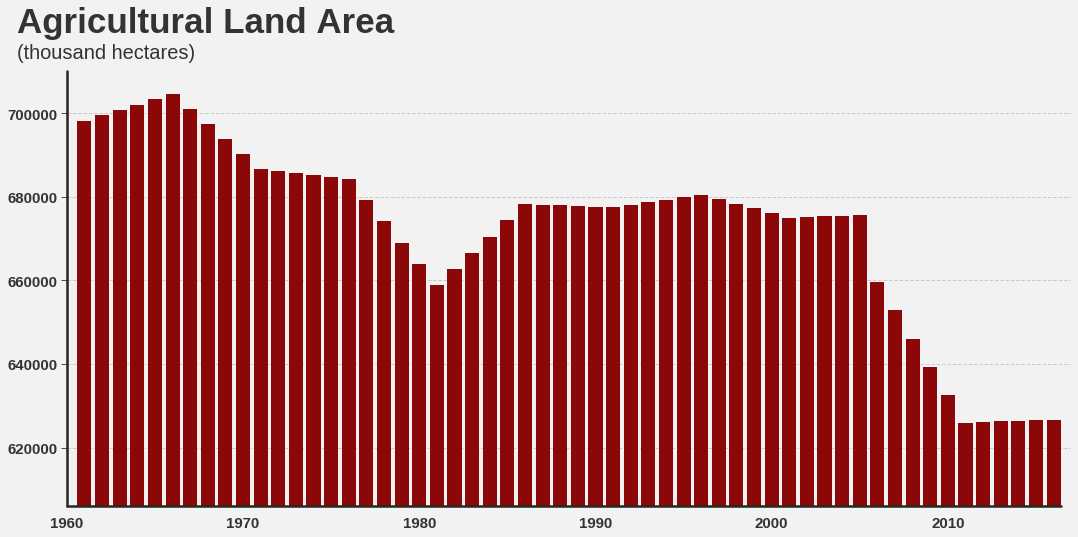

In [812]:
# DEPRECIATED GRAPH
# data is too wide and inaccurate as farm amount includes small homeowner garden
fig, ax = plt.subplots(figsize=(18, 8))

font = FontProperties()
font.set_style('normal')

fig.patch.set(facecolor='#F2F2F2') # background (exterior)
ax.set(facecolor='#F2F2F2') # axes background (interior)

plt.style.use('seaborn-ticks')

plt.title(x=-0.05, y=1.09, label="Area of Arable Land, Canada", 
          ha='left', fontproperties=font, weight='bold', fontsize=35, 
          color='#333333', transform=ax.transAxes)
ax.text(x=-0.05, y=1.0315, s='(thousand hectares)', 
        ha='left', weight='normal', fontsize=20, color='#333333', 
        transform=ax.transAxes)

plt.bar(cdn_agro_land_df['year'], cdn_agro_land_df['area'], 
        width=0.8, align='center', color='#8C0808')
# plt.axvline(x=0, linestyle='--', color='black', linewidth=1, alpha=0.2)
# plt.axhline(y=0, linestyle='--', color='black', linewidth=1, alpha=0.2)
ax.tick_params(axis='both', which='both', labelsize=12, 
               bottom=False, top=False, labelbottom=True,
               left=True, right=False, labelleft=True)

ax.set_xticklabels(['1960', '1970', '1980', '1990', '2000', '2010'], 
                   size=15, weight='bold', color='#333333')
ax.set_yticklabels(range(600000, 710000, 20000), 
                   size=15, weight='bold', color='#333333')

ax.grid(True, 'major', 'y', ls='--', lw=1, c='#333333', alpha=.2)

plt.xlim(1960, 2017)
plt.ylim(605970, 710000)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_smart_bounds(True)
ax.spines['left'].set_linewidth(2.5)
ax.spines['left'].set_capstyle("round")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['bottom'].set_capstyle("round")

plt.show()

## Number and Cancer Incidence - Canada and the Provinces Plot

Source: Statistics Canada

In [55]:
cdn_cancer_2013_2017_df = pd.read_csv('https://github.com/Vanagand/DS-Unit-1-Build/raw/master/cdn_cancer_2013_2017.csv')

# Isolating cancer incidences by province
geo_pe = (cdn_cancer_2013_2017_df['geo'] == 'Prince Edward Island') &\
(cdn_cancer_2013_2017_df['uom'] == 'Rate per 100,000 population')
geo_cdn = (cdn_cancer_2013_2017_df['geo'] == 'Canada (excluding Quebec)') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Rate per 100,000 population')
geo_sk = (cdn_cancer_2013_2017_df['geo'] == 'Saskatchewan') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Rate per 100,000 population')
geo_nb = (cdn_cancer_2013_2017_df['geo'] == 'New Brunswick') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Rate per 100,000 population')
geo_nt = (cdn_cancer_2013_2017_df['geo'] == 'Northwest Territories') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Rate per 100,000 population')
geo_nu = (cdn_cancer_2013_2017_df['geo'] == 'Nunavut') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Rate per 100,000 population')
geo_mb = (cdn_cancer_2013_2017_df['geo'] == 'Manitoba') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Rate per 100,000 population')
geo_ns = (cdn_cancer_2013_2017_df['geo'] == 'Nova Scotia') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Rate per 100,000 population')
geo_on = (cdn_cancer_2013_2017_df['geo'] == 'Ontario') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Rate per 100,000 population')
geo_nl = (cdn_cancer_2013_2017_df['geo'] == 'Newfoundland and Labrador') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Rate per 100,000 population')
geo_bc = (cdn_cancer_2013_2017_df['geo'] == 'British Columbia') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Rate per 100,000 population')
geo_ab = (cdn_cancer_2013_2017_df['geo'] == 'Alberta') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Rate per 100,000 population')
geo_yt = (cdn_cancer_2013_2017_df['geo'] == 'Yukon') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Rate per 100,000 population')
geo_all = (cdn_cancer_2013_2017_df['geo'] != 'Canada (excluding Quebec)') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Rate per 100,000 population')

all_cdn = cdn_cancer_2013_2017_df[geo_all]

cdn_cancer_2013_2017_df[geo_yt]


,year,geo,age,sex,(ICD-O-3),characteristics,uom,value
105,2013,Yukon,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Cancer incidence rate,"Rate per 100,000 population",383.3
106,2014,Yukon,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Cancer incidence rate,"Rate per 100,000 population",350.1
107,2015,Yukon,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Cancer incidence rate,"Rate per 100,000 population",451.0
108,2016,Yukon,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Cancer incidence rate,"Rate per 100,000 population",428.0
109,2017,Yukon,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Cancer incidence rate,"Rate per 100,000 population",390.5


In [56]:
geo_province = (cdn_cancer_2013_2017_df['geo'] != 'Canada (excluding Quebec)') &\
(cdn_cancer_2013_2017_df['uom'] == 'Rate per 100,000 population')

print(cdn_cancer_2013_2017_df[geo_province]['value'].describe())

cdn_cancer_2013_2017_df[geo_pe]

count     60.000000
mean     499.763333
std      136.831946
min      180.700000
25%      427.925000
50%      503.200000
75%      619.250000
max      686.600000
Name: value, dtype: float64


,year,geo,age,sex,(ICD-O-3),characteristics,uom,value
25,2013,Prince Edward Island,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Cancer incidence rate,"Rate per 100,000 population",607.2
26,2014,Prince Edward Island,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Cancer incidence rate,"Rate per 100,000 population",616.8
27,2015,Prince Edward Island,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Cancer incidence rate,"Rate per 100,000 population",629.6
28,2016,Prince Edward Island,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Cancer incidence rate,"Rate per 100,000 population",605.6
29,2017,Prince Edward Island,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Cancer incidence rate,"Rate per 100,000 population",614.7


In [57]:
cdn_wb_cancer_mean_year_condition = all_cdn['year'] == 2017
cdn_wb_cancer_year = all_cdn[cdn_wb_cancer_mean_year_condition]
round((cdn_wb_cancer_year['value'].sum())/9, 3)

664.3

In [58]:
# Explore value as a list
cdn_wb_cancer_geo_condition = all_cdn['geo'] == 'Manitoba'
wb_cancer_incidence = all_cdn[cdn_wb_cancer_geo_condition]

print(all_cdn['value'].describe())
print('')
list(round(wb_cancer_incidence['value'], 1))

count     60.000000
mean     499.763333
std      136.831946
min      180.700000
25%      427.925000
50%      503.200000
75%      619.250000
max      686.600000
Name: value, dtype: float64



[500.2, 500.4, 497.2, 491.2, 472.7]

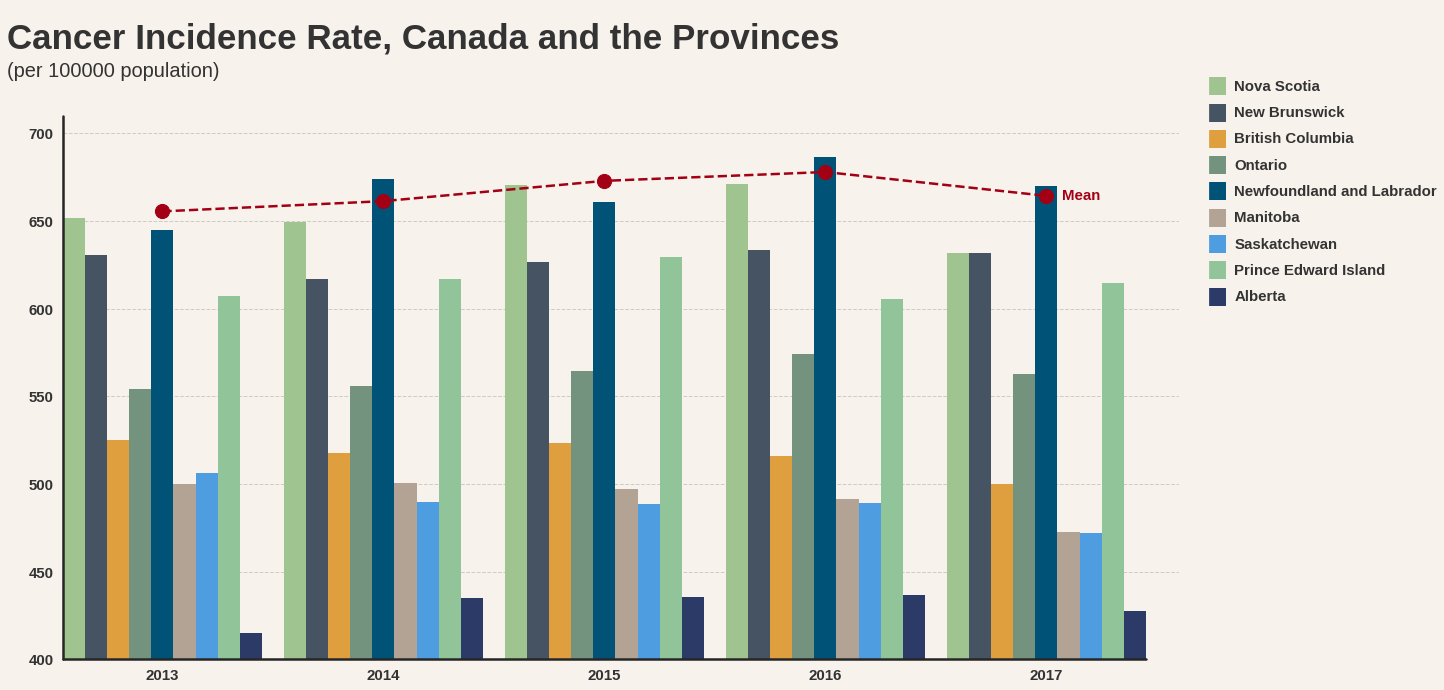

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))

font = FontProperties()
font.set_style('normal')

fig.patch.set(facecolor='#F7F2EC') # Background (exterior)
ax.set(facecolor='#F7F2EC') # Axes background (interior)

plt.style.use('seaborn-ticks')

n = 5
index = np.arange(n) # label coordinate
width = 0.1  # the width of the bars

plt.title(x=-0.05, y=1.125, label="Cancer Incidence Rate, Canada and the Provinces", 
          ha='left', fontproperties=font, weight='bold', fontsize=35, 
          color='#333333', transform=ax.transAxes)
ax.text(x=-0.05, y=1.072, s='(per 100000 population)', 
        ha='left', weight='normal', fontsize=20, color='#333333', 
        transform=ax.transAxes)

# data_qc = () no data
data_ns = (651.8, 649.4, 670.6, 670.9, 631.8)
data_nb = (630.8, 616.6, 626.6, 633.4, 631.9)
data_bc = (524.8, 517.9, 523.3, 515.7, 499.8)
data_on = (554.2, 556.1, 564.5, 574.2, 562.9)
data_nl = (645.0, 674.0, 660.8, 686.6, 670.0)
data_mb = (500.2, 500.4, 497.2, 491.2, 472.7)
data_sk = (506.0, 489.7, 488.4, 489.0, 471.8)
data_pe = (607.2, 616.8, 629.6, 605.6, 614.7)
data_ab = (415.0, 435.2, 435.3, 436.4, 427.7)

bar_ns = plt.bar(index, data_ns, width, color='#9FC490') # New color entry
bar_nb = plt.bar(index + width, data_nb, width, color='#465362') # New color entry
bar_bc = plt.bar(index + 2*width, data_bc, width, color='#E09F3E')
bar_on = plt.bar(index + 3*width, data_on, width, color='#73937E')
bar_nl = plt.bar(index + 4*width, data_nl, width, color='#005377') # New color entry
bar_mb = plt.bar(index + 5*width, data_mb, width, color='#B3A394')
bar_sk = plt.bar(index + 6*width, data_sk, width, color='#4D9DE0')
bar_pe = plt.bar(index + 7*width, data_pe, width, color='#91C499') # New color entry
bar_ab = plt.bar(index + 8*width, data_ab, width, color='#2B3A67')

ax.tick_params(axis='both', which='both', labelsize=12, 
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)

plt.plot([0.4, 1.4, 2.4, 3.4, 4.4], [655.444, 661.278, 672.844, 677.889, 664.3], linewidth=2.5, ls='--', c='#A30015', zorder=2)
plt.scatter([0.4, 1.4, 2.4, 3.4, 4.4], [655.444, 661.278, 672.844, 677.889, 664.3], s=200, c='#A30015', zorder=2)
ax.text(4.47, 664.3, s='Mean', verticalalignment='center', horizontalalignment='left', size=15, weight='bold', color='#A30015', zorder=2)

ax.text(5.1, 740, s='.', verticalalignment='center', horizontalalignment='left', size=120, weight='bold', color='#9FC490', zorder=1)
ax.text(5.25, 726.8, s='Nova Scotia', verticalalignment='center', horizontalalignment='left', size=15, weight='bold', color='#333333', zorder=1)
ax.text(5.1, 725, s='.', verticalalignment='center', horizontalalignment='left', size=120, weight='bold', color='#465362', zorder=1)
ax.text(5.25, 711.8, s='New Brunswick', verticalalignment='center', horizontalalignment='left', size=15, weight='bold', color='#333333', zorder=1)
ax.text(5.1, 710, s='.', verticalalignment='center', horizontalalignment='left', size=120, weight='bold', color='#E09F3E', zorder=1)
ax.text(5.25, 696.8, s='British Columbia', verticalalignment='center', horizontalalignment='left', size=15, weight='bold', color='#333333', zorder=1)
ax.text(5.1, 695, s='.', verticalalignment='center', horizontalalignment='left', size=120, weight='bold', color='#73937E', zorder=1)
ax.text(5.25, 681.8, s='Ontario', verticalalignment='center', horizontalalignment='left', size=15, weight='bold', color='#333333', zorder=1)
ax.text(5.1, 680, s='.', verticalalignment='center', horizontalalignment='left', size=120, weight='bold', color='#005377', zorder=1)
ax.text(5.25, 666.8, s='Newfoundland and Labrador', verticalalignment='center', horizontalalignment='left', size=15, weight='bold', color='#333333', zorder=1)
ax.text(5.1, 665, s='.', verticalalignment='center', horizontalalignment='left', size=120, weight='bold', color='#B3A394', zorder=1)
ax.text(5.25, 651.8, s='Manitoba', verticalalignment='center', horizontalalignment='left', size=15, weight='bold', color='#333333', zorder=1)
ax.text(5.1, 650, s='.', verticalalignment='center', horizontalalignment='left', size=120, weight='bold', color='#4D9DE0', zorder=1)
ax.text(5.25, 636.8, s='Saskatchewan', verticalalignment='center', horizontalalignment='left', size=15, weight='bold', color='#333333', zorder=1)
ax.text(5.1, 635, s='.', verticalalignment='center', horizontalalignment='left', size=120, weight='bold', color='#91C499', zorder=1)
ax.text(5.25, 621.8, s='Prince Edward Island', verticalalignment='center', horizontalalignment='left', size=15, weight='bold', color='#333333', zorder=1)
ax.text(5.1, 620, s='.', verticalalignment='center', horizontalalignment='left', size=120, weight='bold', color='#2B3A67', zorder=1)
ax.text(5.25, 606.8, s='Alberta', verticalalignment='center', horizontalalignment='left', size=15, weight='bold', color='#333333', zorder=1)

ax.set_xticklabels(['2013', '2014','2015','2016', '2017'], size=15, weight='bold', color='#333333')
ax.set_yticklabels(range(400, 701, 50), size=15, weight='bold', color='#333333')
ax.set_yticks(range(400, 701, 50))
ax.set_xticks([0.4, 1.4, 2.4, 3.4, 4.4])

plt.ylim(400, 710)
plt.xlim(-0.05, 5)

ax.grid(True, 'major', 'y', ls='--', lw=1, c='#333333', alpha=.2)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_smart_bounds(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['left'].set_capstyle("round")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['bottom'].set_capstyle("round")

# plt.savefig("cdn_census_cancer_plot.png", bbox_inches='tight', facecolor='#F7F2EC', dpi=300)

plt.show()

In [14]:
cancer_numbers = (cdn_cancer_2013_2017_df['uom'] == 'Number')

cancer_pivot = cdn_cancer_2013_2017_df[cancer_numbers].pivot_table(index='geo',
                                    columns='year',
                                    values='value')

cancer_pivot

year,2013,2014,2015,2016,2017
geo,,,,,
Alberta,16520.0,17770.0,18040.0,18310.0,18150.0
British Columbia,24300.0,24380.0,24995.0,25060.0,24610.0
Canada (excluding Quebec),143115.0,145300.0,148125.0,151150.0,149435.0
Manitoba,6325.0,6400.0,6425.0,6455.0,6310.0
New Brunswick,4785.0,4680.0,4755.0,4835.0,4845.0
Newfoundland and Labrador,3400.0,3560.0,3490.0,3635.0,3540.0
Northwest Territories,130.0,160.0,140.0,170.0,170.0
Nova Scotia,6130.0,6095.0,6280.0,6325.0,6005.0
Nunavut,65.0,65.0,70.0,70.0,85.0


#Heatmap attempt

In [0]:
# Year 2016
# var_province = ['Nova Scotia','New Brunswick','British Columbia', 'Ontario', 'Newfoundland and Labrador', 'Manitoba' , 'Saskatchewan', 'Prince Edward Island' , 'Alberta']
# var_province = [1, 2, 3, 4, 5, 6, 7, 8, 9]
var_area = [915.7, 835.3 ,6400.5, 12348.5,70.7, 17637.6, 61585.8, 575.5, 50250.2]
var_cancer_rate = [670.9, 633.4, 515.7, 574.2, 686.6, 491.2, 489.0, 605.6, 436.4]
var_cancer_number  = [6325, 4835, 25060, 79670, 3635, 6455, 5555, 890, 18310.]

grouped_vars = {'Area':var_area, 'Rate':var_cancer_rate, 'Number':var_cancer_number}
heat_df = pd.DataFrame(grouped_vars)

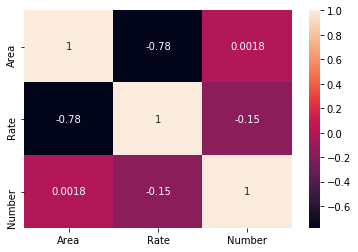

In [14]:
corr = heat_df.corr()
# plot the heatmap and annotation on it
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

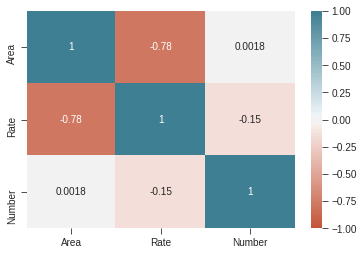

In [23]:
corr = heat_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False, annot=True
);

# plt.savefig("cdn_cancer_area_heat.png", bbox_inches='tight', facecolor='#F7F2EC', dpi=300)

In [39]:
heat_df.cov()

,Province,Area,Rate
Province,7.5000,3.902729e+04,-1.447250e+02
Area,39027.2875,5.379500e+08,-1.595182e+06
Rate,-144.7250,-1.595182e+06,7.820978e+03


#CDN aggricultural land percentage dataframe

In [18]:
cdn_agri_pct_df = pd.read_csv('https://github.com/Vanagand/DS-Unit-1-Build/raw/master/cdn_agri_land.csv')

cdn_agri_pct_df.tail(10)

,year,value
46,2007,7.17901
47,2008,7.10516
48,2009,7.03141
49,2010,6.95756
50,2011,6.88370
51,2012,6.88533
52,2013,6.88696
53,2014,6.88858
54,2015,6.89021
55,2016,6.89184


#CDN farm amount dataframe

In [367]:
# Depreciated data
# Number of farms is not an accurate representation of the overall amount of farm area
# as more populated provinces have an increase in smaller operations while the main
# agricultural provinces have fewer but much larger fields
cdn_farm_df = pd.read_csv('https://github.com/Vanagand/DS-Unit-1-Build/raw/master/cdn_total_farm.csv')

cdn_farm_df.head()

,date,geo,farm_class,uom,value
0,2011,Canada,Total number of farms,number,205730
1,2016,Canada,Total number of farms,number,193492
2,2011,Canada,Farms under 10 acres,number,12991
3,2016,Canada,Farms under 10 acres,number,13193
4,2011,Canada,Farms 10 to 69 acres,number,32705


In [0]:
total_farm_2011_condition = (cdn_farm_df['farm_class'] == 'Total number of farms') & (cdn_farm_df['date'] == 2011) & (cdn_farm_df['geo'] != 'Canada')
cdn_farm_total_2011_df = cdn_farm_df[total_farm_2011_condition].drop(['uom'], axis=1)
total_farm_2016_condition = (cdn_farm_df['farm_class'] == 'Total number of farms') & (cdn_farm_df['date'] == 2016) & (cdn_farm_df['geo'] != 'Canada')
cdn_farm_total_2016_df = cdn_farm_df[total_farm_2016_condition].drop(['uom'], axis=1)

In [369]:
print(cdn_farm_total_2011_df.describe())
print('')
print(cdn_farm_total_2016_df.describe())

         date         value
count    10.0     10.000000
mean   2011.0  20573.000000
std       0.0  18957.683637
min    2011.0    510.000000
25%    2011.0   2934.500000
50%    2011.0  17818.000000
75%    2011.0  35073.250000
max    2011.0  51950.000000

         date         value
count    10.0     10.000000
mean   2016.0  19349.200000
std       0.0  18077.057158
min    2016.0    407.000000
25%    2016.0   2560.750000
50%    2016.0  16159.500000
75%    2016.0  33122.000000
max    2016.0  49600.000000


In [640]:
cdn_farm_total_2011_df

,date,geo,farm_class,value
30,2011,Newfoundland and Labrador,Total number of farms,510
60,2011,Prince Edward Island,Total number of farms,1495
90,2011,Nova Scotia,Total number of farms,3905
120,2011,New Brunswick,Total number of farms,2611
150,2011,Quebec,Total number of farms,29437
180,2011,Ontario,Total number of farms,51950
210,2011,Manitoba,Total number of farms,15877
240,2011,Saskatchewan,Total number of farms,36952
270,2011,Alberta,Total number of farms,43234
300,2011,British Columbia,Total number of farms,19759


In [639]:
cdn_farm_total_2016_df

,date,geo,farm_class,value
31,2016,Newfoundland and Labrador,Total number of farms,407
61,2016,Prince Edward Island,Total number of farms,1353
91,2016,Nova Scotia,Total number of farms,3478
121,2016,New Brunswick,Total number of farms,2255
151,2016,Quebec,Total number of farms,28919
181,2016,Ontario,Total number of farms,49600
211,2016,Manitoba,Total number of farms,14791
241,2016,Saskatchewan,Total number of farms,34523
271,2016,Alberta,Total number of farms,40638
301,2016,British Columbia,Total number of farms,17528
